# DataManim_3 (작업 2유형 연습문제)
* https://www.datamanim.com/dataset/03_dataq/typetwo.html

In [6]:
import pandas as pd
import numpy as np
# pd.options.display.max_columns = 20
# pd.options.display.max_rows = 60
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)

## 1 서비스 이탈예측 데이터
* 데이터 설명 : 고객의 신상정보 데이터를 통한 회사 서비스 이탈 예측 (종속변수 : Exited)

In [21]:
#데이터 로드
x_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/y_train.csv")
x_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/X_test.csv")

display(x_train.head())
display(y_train.head())
y_test = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/y_test.csv') # 평가용

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15799217,Zetticci,791,Germany,Female,35,7,52436.20,1,1,0,161051.75
1,15748986,Bischof,705,Germany,Male,42,8,166685.92,2,1,1,55313.51
2,15722004,Hsiung,543,France,Female,31,4,138317.94,1,0,0,61843.73
3,15780966,Pritchard,709,France,Female,32,2,0.00,2,0,0,109681.29
4,15636731,Ts'ai,714,Germany,Female,36,1,101609.01,2,1,1,447.73


,CustomerId,Exited
0,15799217,0
1,15748986,0
2,15722004,0
3,15780966,0
4,15636731,0


### 1) 데이터 이해
* 데이터 타입, 기술통계, 상관관계

In [8]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       6499 non-null   int64  
 1   Surname          6499 non-null   object 
 2   CreditScore      6499 non-null   int64  
 3   Geography        6499 non-null   object 
 4   Gender           6499 non-null   object 
 5   Age              6499 non-null   int64  
 6   Tenure           6499 non-null   int64  
 7   Balance          6499 non-null   float64
 8   NumOfProducts    6499 non-null   int64  
 9   HasCrCard        6499 non-null   int64  
 10  IsActiveMember   6499 non-null   int64  
 11  EstimatedSalary  6499 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 609.4+ KB


In [14]:
display(x_train['Geography'].value_counts().to_frame().T)
display(x_train['Gender'].value_counts().to_frame().T)
display(x_train['Tenure'].value_counts().to_frame().T)
display(x_train['NumOfProducts'].value_counts().to_frame().T)
display(x_train['HasCrCard'].value_counts().to_frame().T)
display(x_train['IsActiveMember'].value_counts().to_frame().T)

,France,Germany,Spain
Geography,3227,1650,1622


,Male,Female,male,female
Gender,3485,2861,80,73


,5,9,2,1,7,3,8,6,4,10,0
Tenure,676,676,670,662,661,654,651,635,633,316,265


,1,2,3,4
NumOfProducts,3360,2939,161,39


,1,0
HasCrCard,4607,1892


,1,0
IsActiveMember,3343,3156


<AxesSubplot:>

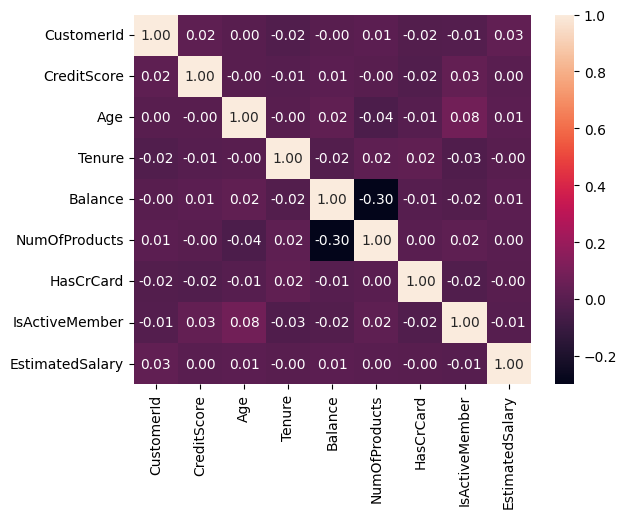

In [11]:
import seaborn as sns

sns.heatmap(x_train.corr(numeric_only=True),
            annot=True,
            fmt='.2f')

### 2) 데이터 전처리
* 변수 제거, 결측치 처리, x/y분리, 범주형 변수 가변수화, 학습/평가 분리, 정규화

In [22]:
x_train['Gender'] = np.where(x_train['Gender'].str.contains('Female|female'), 0, 1)
x_test['Gender'] = np.where(x_test['Gender'].str.contains('Female|female'), 0, 1)
display(x_train['Gender'].value_counts().to_frame().T)
display(x_test['Gender'].value_counts().to_frame().T)

,1,0
Gender,3565,2934


,1,0
Gender,1892,1609


In [25]:
y_train.drop(columns='CustomerId', axis=1, inplace=True)

In [23]:
# 변수 제거
x_train.drop(columns=['CustomerId', 'Surname'], axis=1, inplace=True)
x_test.drop(columns=['CustomerId', 'Surname'], axis=1, inplace=True)

# 결측치 처리 (없음)
# print(x_train.isna().sum())
# print(x_test.isna().sum())

# 가변수화
dumm_cols = ['Geography', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
x_train = pd.get_dummies(x_train, columns=dumm_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=dumm_cols, drop_first=True)
x_train.head()

,CreditScore,Gender,Age,Tenure,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1
0,791,0,35,7,52436.20,161051.75,1,0,0,0,0,1,0
1,705,1,42,8,166685.92,55313.51,1,0,1,0,0,1,1
2,543,0,31,4,138317.94,61843.73,0,0,0,0,0,0,0
3,709,0,32,2,0.00,109681.29,0,0,1,0,0,0,0
4,714,0,36,1,101609.01,447.73,1,0,1,0,0,1,1


In [24]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [45]:
display(pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/X_train.csv"))
display(pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/churnk/y_train.csv"))

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15799217,Zetticci,791,Germany,Female,35,7,52436.20,1,1,0,161051.75
1,15748986,Bischof,705,Germany,Male,42,8,166685.92,2,1,1,55313.51
2,15722004,Hsiung,543,France,Female,31,4,138317.94,1,0,0,61843.73
3,15780966,Pritchard,709,France,Female,32,2,0.00,2,0,0,109681.29
4,15636731,Ts'ai,714,Germany,Female,36,1,101609.01,2,1,1,447.73
...,...,...,...,...,...,...,...,...,...,...,...,...
6494,15702806,Martin,696,Spain,Male,24,9,0.00,1,0,0,10883.52
6495,15674179,Vorobyova,513,Germany,Male,34,7,60515.13,1,0,0,124571.09
6496,15790204,Myers,663,Spain,Female,22,9,0.00,1,1,0,29135.89
6497,15690772,Hughes,635,Spain,Female,48,2,0.00,2,1,1,136551.25


,CustomerId,Exited
0,15799217,0
1,15748986,0
2,15722004,0
3,15780966,0
4,15636731,0
...,...,...
6494,15702806,0
6495,15674179,0
6496,15790204,1
6497,15690772,0


In [48]:
from sklearn.model_selection import train_test_split

x_train_t, x_val, y_train, y_val = train_test_split(x_train_s, y_train, test_size=0.3)

### 3) 모델링
* 모델 불러오기, 선언, 학습, 예측, 평가

In [51]:
y_train_r = y_train.values.ravel() # y_train.values.reshape(-1)
y_val_r = y_val.values.ravel() # y_val.values.reshape(-1)

In [54]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(x_train_t, y_train_r)
y_val_pred = model_rf.predict(x_val)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val_r, y_val_pred))
print(classification_report(y_val_r, y_val_pred))

[[1492   70]
 [ 206  182]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1562
           1       0.72      0.47      0.57       388

    accuracy                           0.86      1950
   macro avg       0.80      0.71      0.74      1950
weighted avg       0.85      0.86      0.85      1950



In [59]:
pred = pd.DataFrame({'Exited':y_val_pred})
pred.head()

,Exited
0,0
1,0
2,1
3,0
4,0


In [56]:
y_val_proba = model_rf.predict_proba(x_val)[:, 1]

In [57]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_val_r, y_val_proba))

0.8427595799728078


In [60]:
proba = pd.DataFrame({'Exited':y_val_proba})
proba.head()

,Exited
0,0.00
1,0.21
2,0.80
3,0.25
4,0.02


## 2